In [46]:
# Load modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

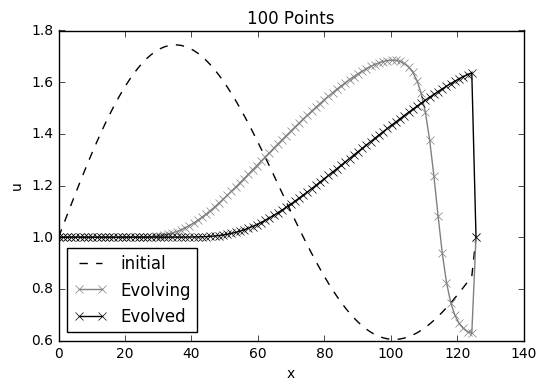

In [47]:
# Let's evolve burgers' equation in time

nx = 100 # number of x points
nt = 60000 # number of time steps
x = np.linspace(0, 40 * np.pi, nx)

# initially purturb u
u = 1 + .5 * np.sin(x/20) + 0.3 * np.sin(x/35)
u[-1] = 1

u0 = u.copy()
dx = x[1] - x[0]
dt = .001

# The viscosity is non-uniform
nu = np.ones(x.size) * 1e-6 + 1e-4 * np.sin(x / 10) + 1e-6 * np.sin(x / 20) + 1e-6 * np.sin(x / 30)

# u_record holds all the snapshots. 
# The rows represent spatial points and the columns are different times.
u_record = np.zeros((nx, nt/200))

# Evolve through time
ii = 0
for _ in range(nt):
    un = u.copy()
    u[1:-1] = un[1:-1] + dt *( -1 * un[1:-1] * (un[1:-1] - un[:-2]) / dx + nu[1:-1] * (u[2:] - 2 * u[1:-1] + u[:-2]) / dx**2 )

    # Save every 200th time step
    if _ % (200) == 0:
        u_record[:, ii] = u
        ii += 1
    
plt.plot(x, u0, ls='--', c='k', label="initial")
plt.plot(x, u_record[:, -100], c='grey', label="Evolving", marker='x')
plt.plot(x, u_record[:, -1], c='k', label="Evolved", marker='x')
#plt.plot(x, u, c='k', label="Evolved", marker='x')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.legend(loc="lower left")
ax.set_title("%i Points"%nx)
ax.set_ylabel("u")
ax.set_xlabel('x')


In [121]:
# Calculate the covariance matrix
a = np.dot(u_record, u_record.T)
# a = np.dot(u_record.T, u_record)
a.shape, u_record.shape

((100, 100), (100, 300))

In [122]:
# SVD the covariance matrix
P, D, Q = np.linalg.svd(a, full_matrices=True) # P D Q is the approximation
print P.shape, D.shape, Q.shape
assert(np.allclose(a, np.dot(P * D, Q))) # check that a = P D Q
P.shape, Q.shape

(100, 100) (100,) (100, 100)


((100, 100), (100, 100))

(0, 100)

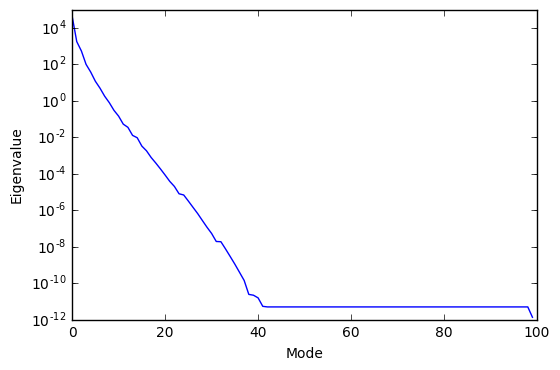

In [123]:
# plot eigenvalues
plt.plot(D)
plt.yscale('log')
plt.xlabel("Mode")
plt.ylabel("Eigenvalue")
plt.xlim(0, 100)

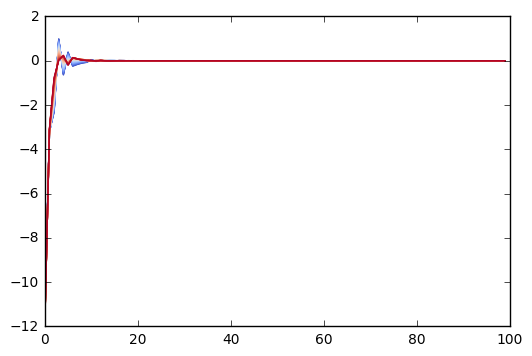

In [124]:
# The columns of phi are the basis functions, right?

# Calculate the basis functions
phi = np.dot(P.T, u_record)

# normalize phi - makes my solution worse!
#for i in range(len(phi[1, :])):
#    phi[:, i] = phi[:, i] / np.sum(phi[:, i])

# plot first 10 functions
colors = plt.cm.coolwarm(np.arange(50) / 49.)
for i in range(50): plt.plot(phi[:, i], c=colors[i])
    
# TODO Check if orthogonal

((100, 100), (100, 300))

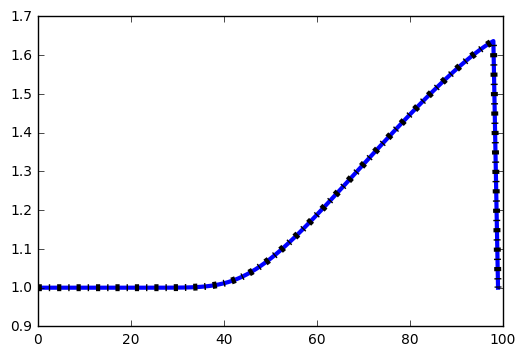

In [125]:
# plot the snapshot at last time 
plt.plot(u_record[:, -1], linewidth=3)

# reconstruct the snapshot using phi
ubar = np.dot(Q.T, phi)
plt.plot(ubar[:, -1], c='k', ls='-.', linewidth=5)
Q.shape, phi.shape
#plt.ylim(0,2)

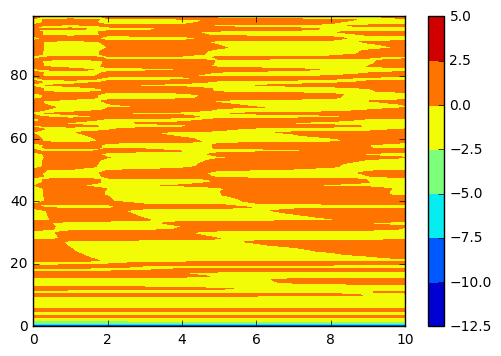

In [107]:
plt.contourf(phi)
plt.xlim(0,10)
plt.colorbar()

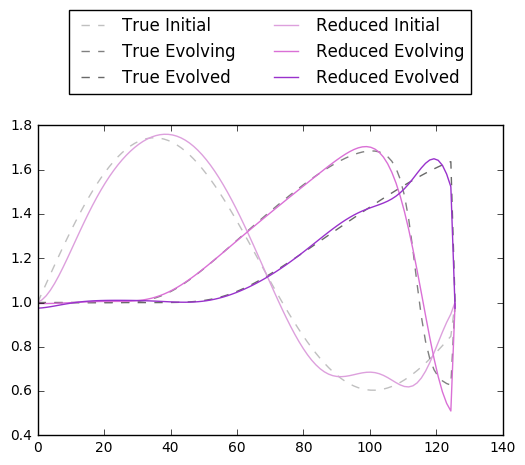

In [108]:
MODES = 5

ubar_red = np.dot(Q[:MODES, :].T, phi[:MODES, :])

plt.plot(x, u_record[:, 0], ls='--', c='silver', label="True Initial")
plt.plot(x, u_record[:, -100], c='grey', label="True Evolving", ls='--')
plt.plot(x, u_record[:, -1], c='dimgrey', label="True Evolved", ls='--')

plt.plot(x,ubar_red[:, 0], c='plum', label="Reduced Initial")
plt.plot(x,ubar_red[:, -100], c='orchid', label="Reduced Evolving")
plt.plot(x,ubar_red[:, -1], c='darkorchid', label="Reduced Evolved")
plt.legend(bbox_to_anchor=[.95, 1.4], ncol=2)

In [109]:
def dadt(a): # a is a 1 x nx vector
    nl = a * np.sum(Q, axis=0) * np.sum(np.gradient(Q, dx, axis=0), axis=0)
    l = nu * a * np.gradient(np.gradient(Q[0,:], dx, axis=0), dx, axis=0)
    return l + nl
dadt(Q[0,:])

array([ 8.13486796e-03, -1.29793924e-02,  7.90463655e-04,  2.29264173e-02,
        4.01856600e-04, -2.37833836e-03,  4.54157595e-03, -1.51129403e-03,
        1.23829770e-02,  3.03204085e-02, -9.27083313e-03, -6.51455239e-03,
        7.17821929e-03,  1.88104433e-02,  1.77176734e-05,  3.49686075e-04,
       -1.66750622e-02, -4.21370131e-03, -8.07890980e-05, -5.55111170e-03,
        1.24327656e-03, -4.24653822e-02,  6.78483389e-03,  4.80810505e-02,
        1.67464258e-02, -8.87480724e-03,  4.90512284e-03, -2.01866366e-04,
        6.65656078e-03,  1.26740854e-02,  2.79996963e-02, -2.46984200e-02,
        4.87968621e-03, -1.29506068e-02, -3.59572231e-04, -1.02456863e-02,
        9.51158966e-03,  1.13916482e-03,  4.65052092e-04,  1.47693851e-03,
        4.08590158e-04, -3.28531868e-04,  1.11466457e-02, -4.34551124e-03,
       -2.24521012e-04,  9.38626725e-04,  9.77925243e-03,  9.29553909e-04,
        6.41791031e-03, -2.57267425e-03, -1.95861419e-02, -9.00442850e-02,
        2.05347961e-02,  

In [110]:

a = Q[:, 0].copy()
for i in range(len(Q[:, 1])):
    for _ in range(200):
        a += dadt(a) * dt

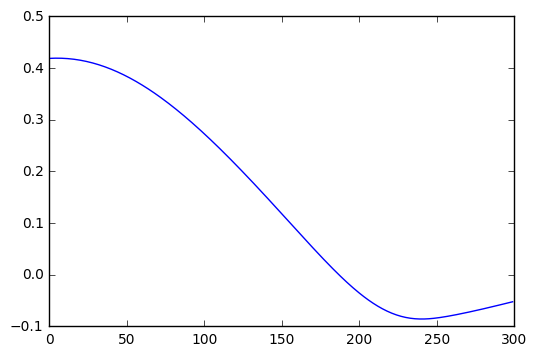

In [111]:
ubar_red2 = np.dot(a[:MODES].T, phi[:MODES, :])

plt.plot(ubar_red2)
